In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

# Select your features (columns)

In [4]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 
                        'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth','koi_prad', 'koi_teq',
                       'koi_insol','koi_model_snr','koi_steff','koi_slogg','koi_srad','ra','dec','koi_kepmag']]

In [5]:
selected_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 0 to 6990
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   koi_fpflag_nt  6991 non-null   int64  
 1   koi_fpflag_ss  6991 non-null   int64  
 2   koi_fpflag_co  6991 non-null   int64  
 3   koi_fpflag_ec  6991 non-null   int64  
 4   koi_period     6991 non-null   float64
 5   koi_time0bk    6991 non-null   float64
 6   koi_impact     6991 non-null   float64
 7   koi_duration   6991 non-null   float64
 8   koi_depth      6991 non-null   float64
 9   koi_prad       6991 non-null   float64
 10  koi_teq        6991 non-null   int64  
 11  koi_insol      6991 non-null   float64
 12  koi_model_snr  6991 non-null   float64
 13  koi_steff      6991 non-null   int64  
 14  koi_slogg      6991 non-null   float64
 15  koi_srad       6991 non-null   float64
 16  ra             6991 non-null   float64
 17  dec            6991 non-null   float64
 18  koi_kepm

# Create a Train Test Split

Use `koi_disposition` for the y values

In [6]:
target=df['koi_disposition']
target.head()

0         CONFIRMED
1    FALSE POSITIVE
2    FALSE POSITIVE
3         CONFIRMED
4         CONFIRMED
Name: koi_disposition, dtype: object

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(selected_features,target,random_state=42)

In [8]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,133.077240,0.150,3.61600,123.1,1.24,1017,253.30,10.8,5737,4.327,1.125,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,132.020050,0.291,2.30900,114.6,0.86,1867,2891.64,13.8,5855,4.578,0.797,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,134.460380,0.970,79.89690,641.1,3.21,989,226.81,254.3,6328,4.481,0.963,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,174.662240,0.300,2.63120,875.4,2.25,696,55.37,38.4,4768,4.536,0.779,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,172.258529,0.831,2.22739,9802.0,12.21,1103,349.40,696.5,5712,4.359,1.082,292.16705,48.727589,15.263


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [9]:
# Scale your data
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
X_scaler=MinMaxScaler().fit(X_train)
X_train_scaled=X_scaler.transform(X_train)
X_test_scaled=X_scaler.transform(X_test)

# Train the Model



k: 1, Train/Test Score: 1.000/0.794
k: 3, Train/Test Score: 0.891/0.796
k: 5, Train/Test Score: 0.863/0.795
k: 7, Train/Test Score: 0.844/0.800
k: 9, Train/Test Score: 0.836/0.804
k: 11, Train/Test Score: 0.834/0.795
k: 13, Train/Test Score: 0.831/0.795
k: 15, Train/Test Score: 0.830/0.794
k: 17, Train/Test Score: 0.826/0.797
k: 19, Train/Test Score: 0.818/0.792
k: 21, Train/Test Score: 0.823/0.792
k: 23, Train/Test Score: 0.821/0.799
k: 25, Train/Test Score: 0.817/0.792
k: 27, Train/Test Score: 0.815/0.788
k: 29, Train/Test Score: 0.813/0.791


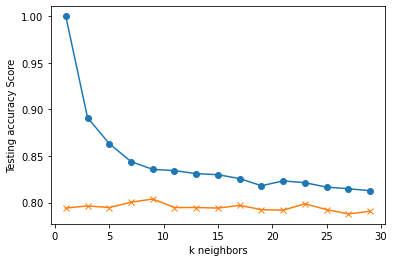

In [10]:
from sklearn.neighbors import KNeighborsClassifier

#Loop thru k values
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [11]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
print('k=11 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=11 Test Acc: 0.795


In [12]:
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

Training Data Score: 0.8342551974060652
Testing Data Score: 0.7946224256292906


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [18]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [10, 11, 12, 13],
              'weights':['uniform','distance'],
              'metric': ['euclidean','manhattan']}
grid = GridSearchCV(knn, param_grid, verbose=3)

In [19]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] metric=euclidean, n_neighbors=10, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=10, weights=uniform, score=0.787, total=   0.1s
[CV] metric=euclidean, n_neighbors=10, weights=uniform ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  metric=euclidean, n_neighbors=10, weights=uniform, score=0.781, total=   0.1s
[CV] metric=euclidean, n_neighbors=10, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=10, weights=uniform, score=0.789, total=   0.1s
[CV] metric=euclidean, n_neighbors=10, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=10, weights=uniform, score=0.787, total=   0.1s
[CV] metric=euclidean, n_neighbors=10, weights=uniform ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  metric=euclidean, n_neighbors=10, weights=uniform, score=0.815, total=   0.1s
[CV] metric=euclidean, n_neighbors=10, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=10, weights=distance, score=0.806, total=   0.1s
[CV] metric=euclidean, n_neighbors=10, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=10, weights=distance, score=0.792, total=   0.1s
[CV] metric=euclidean, n_neighbors=10, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=10, weights=distance, score=0.794, total=   0.1s
[CV] metric=euclidean, n_neighbors=10, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=10, weights=distance, score=0.795, total=   0.1s
[CV] metric=euclidean, n_neighbors=10, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=10, weights=distance, score=0.805, total=   0.1s
[CV] metric=euclidean, n_neighbors=11, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=11, weights=uniform, score=0.

[CV]  metric=manhattan, n_neighbors=11, weights=distance, score=0.810, total=   0.1s
[CV] metric=manhattan, n_neighbors=12, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=12, weights=uniform, score=0.792, total=   0.1s
[CV] metric=manhattan, n_neighbors=12, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=12, weights=uniform, score=0.784, total=   0.1s
[CV] metric=manhattan, n_neighbors=12, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=12, weights=uniform, score=0.790, total=   0.1s
[CV] metric=manhattan, n_neighbors=12, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=12, weights=uniform, score=0.776, total=   0.1s
[CV] metric=manhattan, n_neighbors=12, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=12, weights=uniform, score=0.804, total=   0.1s
[CV] metric=manhattan, n_neighbors=12, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=12, weights=distance, score=0.819

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    6.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=11, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [10, 11, 12, 13],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [20]:
# List the best parameters for this dataset
print(f"Best Parameters: {grid.best_params_}")

# List the best score
print(f"Best Score: {grid.best_score_}")

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best Score: 0.8064077747618598


In [21]:
print(f"Training Grid Score: {grid.score(X_train_scaled, y_train)}")
print(f"Testing Grid Score: {grid.score(X_test_scaled, y_test)}")

Training Grid Score: 1.0
Testing Grid Score: 0.8060640732265446


In [22]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)

In [23]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.61      0.56      0.58       411
     CONFIRMED       0.65      0.68      0.66       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.81      1748
     macro avg       0.75      0.75      0.75      1748
  weighted avg       0.80      0.81      0.80      1748



# Save the Model

In [24]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'adrianaovalle_knn.sav'
joblib.dump(knn, filename)

['adrianaovalle_knn.sav']